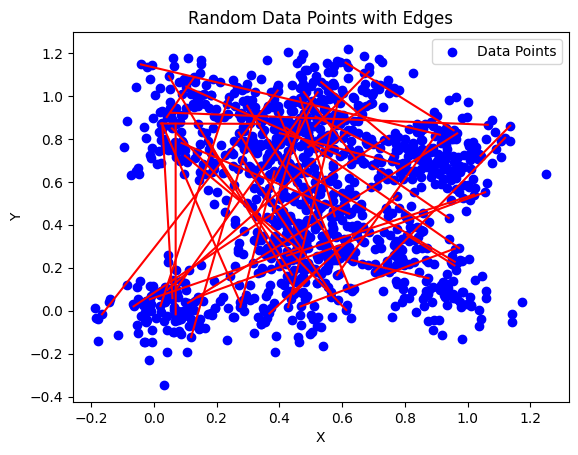

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_points(data_points, edges):
    # Plot data points
    plt.scatter(data_points[:, 0], data_points[:, 1], color='blue', label='Data Points')
    
    # Plot edges
    for edge in edges:
        x = [data_points[edge[0], 0], data_points[edge[1], 0]]
        y = [data_points[edge[0], 1], data_points[edge[1], 1]]
        plt.plot(x, y, color='red')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Random Data Points with Edges')
    plt.legend()
    plt.show()

def generate_random_clustered_data(num_clusters, num_points_per_cluster, num_edges):
    # Generate random cluster centers
    cluster_centers = np.random.rand(num_clusters, 2)
    
    # Generate random data points around cluster centers
    data_points = []
    for center in cluster_centers:
        points = center + np.random.randn(num_points_per_cluster, 2) * 0.1
        data_points.extend(points)
    data_points = np.array(data_points)
    
    # Generate random edges
    edges = np.random.choice(num_clusters * num_points_per_cluster, size=(num_edges, 2), replace=False)
    
    return data_points, edges

# Generate random clustered data points and edges
num_clusters = 20
num_points_per_cluster = 60
num_edges = 50
data_points, edges = generate_random_clustered_data(num_clusters, num_points_per_cluster, num_edges)

# Plot the data points and edges
plot_data_points(data_points, edges)


/home/kalyan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


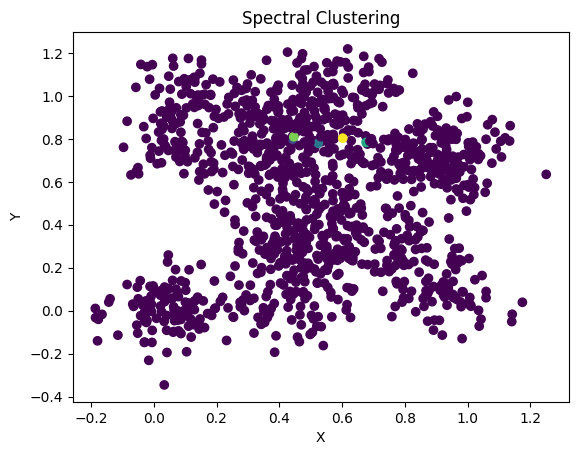

In [10]:
import numpy as np
from sklearn.cluster import KMeans

def spectral_clustering(data_points, edges, num_clusters):
    # Construct adjacency matrix
    num_points = len(data_points)
    adjacency_matrix = np.zeros((num_points, num_points))
    for edge in edges:
        adjacency_matrix[edge[0], edge[1]] = 1
        adjacency_matrix[edge[1], edge[0]] = 1
    
    # Construct degree matrix
    degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
    
    # Compute Laplacian matrix
    laplacian_matrix = degree_matrix - adjacency_matrix
    
    # Compute eigenvectors of the Laplacian matrix
    eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
    
    # Sort eigenvalues and eigenvectors in ascending order
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the second smallest eigenvectors
    k_smallest_eigenvectors = sorted_eigenvectors[:, 1:num_clusters+1]
    
    # Cluster the eigenvectors using K-means
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(k_smallest_eigenvectors)
    labels = kmeans.labels_
    
    return labels

# Set the number of clusters
num_clusters = 6

# Perform spectral clustering
labels = spectral_clustering(data_points, edges, num_clusters)

# Plot the data points with the assigned labels
plt.scatter(data_points[:, 0], data_points[:, 1], c=labels, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spectral Clustering')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering

# Define the function to perform k-means clustering
def perform_kmeans(data_points, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_points)
    return kmeans.labels_

# Perform k-means clustering
kmeans_labels = perform_kmeans(data_points, num_clusters)

# Plot the data points with k-means clustering results
plt.figure(figsize=(10, 4))
plt.subplot(121)
for i in range(num_clusters):
    cluster_points = data_points[kmeans_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], edgecolor='k', label=f'Cluster {i+1}')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


plt.tight_layout()
plt.show()
